### Partie 3 : Complexities

Dans cette partie nous allons déterminer les complexités des fonctions présentes dans le fichier exercise_3_functions.py


#### Exercice 1 : Recherche de la complexité selon la limite supérieure

1. **function_1**

In [ ]:
def function_1(n: int) -> None:
    """
    compute the time complexity of running
    this function as a function of n.
    """
    temp_list = lit()
    for i in range(n**2):
        temp = 0
        for j in range(i):
            temp += j              
        temp_list.append(temp)
    sum(temp_list)

Analysons le code précédant ligne par ligne:
1. ```temp_list = list()```  
    --> cette ligne a une complexité **O(1)**

2. ```for i in range(n**2)```  
    --> cette boucle va s'effectuer n² fois. Ainsi sa complexité équivaut à la somme des coûts des instructions de sa boucle multiplié par n².

3. ```temp = 0```  
    --> cette ligne s'exécute à chaque itération de la boucle et sa complexité est **O(1)**

4. ```for j in range(i):```  
    --> cette boucle va s'effectuer 'i' fois pour chaque valeur de 'i' allant de 0 à 
    (n² - 1). Cette somme peut s'écrire :  
    >
    >$\sum_{i=0}^{n^2 - 1} i$ = $\frac{(n^2 - 1).n^2}{2}$ ≃ $\frac{n^4}{2}$  
    >  
    --> la complexité de cette boucle dépend de ses instructions, ici la seule instruction de la boucle est :
    >
    > temp += j
    >
    ce qui équivaut à une complexité de **O(1)**  
    --> Ainsi cette la complexité de la boucle peut être traduite par :
    >
    > O($\frac{n^4}{2}$) = O($n^4$)
    >

5. ```temp_list.append(temp)```  
    --> cette ligne s'effectue n² fois ainsi le coût de cette ligne est **O(n²)**  

6.  ```sum(temp_list)```  
    --> cette ligne calcule la somme des éléments de temp_list qui contient n² éléments. Ainsi son coût est **O(n²)**.

Ainsi en calculant la complexité on peut voir que :  
    --> O(1) et O(n²) sont négligeable comparé à O($n^4$)  
    --> La complexité totale de la function_1 est donc :  
>
>**O($n^4$)**
>
     

2. **function_2**

In [ ]:
def function_2(n: int) -> None:
    """
    compute the time complexity of running
    this function as a function of n.

    do not hesitate to do some reseach about the
    complexity of the functions used and to average
    the measured times over a number of trials if necessary.
    """
    print(n)
    for i in range(n):
        temp_list = [j+i for j in range(n)]
        shuffle(temp_list)
        max(temp_list)

Analysons le code précédant ligne par ligne:
1. ```print(n)```    
    --> affiche juste n donc **O(1)**

2. ```for i in range(n)```  
    --> La complexité de cette boucle équivaut à la somme de ses instructions. Elle s'effectue n fois.

3. ```temp_list = [j+i for j in range(n)]```  
    --> On additionne j et i pour chaque j dans n. Cette ligne à une complexité de **O(n)**

4. ```shuffle(temp_list)```  
    --> La complexité de cette fonction est **O(n)** (trouvé après une recherche de la documentation de la fonction)

5.  ```max(temp_list)```  
    --> La complexité de cette fonction est **O(n)** (trouvé après une recherche de la documentation de la fonction)

Ainsi on peut calculer la complexité de la fonction :  
--> On peut trouver la complexité de La boucle (ligne 2) en additionnant les complexités des instructions de la boucle :
>
> O(n) + O(n) + O(n) = O(3n) = O(n)
>
--> Cette boucle s'effectue n fois donc :  
>
> n.O(n) = O(n²)
>

Ainsi la complexité de cette boucle est **O(n²)**

#### Exercice 2 : Verification via le code

Pour pouvoir vérifier ces complexités nous testons les fonction 1 et 2 sur un ensemble de valeur de n. On calcule le temps d'exécution de ces fonctions et on les compare avec l'ajustement polynomiale (via numpy.polyfit).
Pour la fonction 1 on a trouvé O($n^4$) et pour la fonction 2 on a trouvé O(n²) ce qui nous donne le code suivant :

##### Temps d'exécution function_1 et function_2 :

In [ ]:
# Temps d'exécution function_1
n_values = [10, 20, 30, 40, 50]
times_function_1 = []

for n in n_values:
    start_time = time.time()
    function_1(n)
    end_time = time.time()
    times_function_1.append(end_time - start_time)

# Temps d'exécution funciton_2
times_function_2 = []

for n in n_values:
    start_time = time.time()
    function_2(n)
    end_time = time.time()
    times_function_2.append(end_time - start_time)

##### Ajustement polynomial

In [ ]:
# polynomial function for function_1
vector_coeff_function_1 = np.polyfit(n_values, times_function_1, deg=4)
polynomial_function_1 = np.poly1d(vector_coeff_function_1)

# polynomial function for function_2
vector_coeff_function_2 = np.polyfit(n_values, times_function_2,  deg=2)
polynomial_function_2 = np.poly1d(vector_coeff_function_2)

##### Dessin des graphes et enregistrement dans un fichier pdf

In [ ]:
# Draw graph
n_fit = np.linspace(min(n_values), max(n_values), 100)

plt.figure(figsize=(12, 6))

# function_1
plt.subplot(1, 2, 1)
plt.plot(n_values, times_function_1, 'o', label='Measures')
plt.plot(n_fit, polynomial_function_1(n_fit), '-', label='Polynomial Adjustment')
plt.title('Elapsed time computing function_1')
plt.xlabel('n')
plt.ylabel('Time in seconds')
plt.legend()

# function_2
plt.subplot(1, 2, 2)
plt.plot(n_values, times_function_2, 'o', label='Measures')
plt.plot(n_fit, polynomial_function_2(n_fit), '-', label='Polynomial Adjustment')
plt.title('Elapsed time computing function_2')
plt.xlabel('n')
plt.ylabel('Time in seconds')
plt.legend()

plt.savefig("complexity.pdf")

#### Résultats :  

Nous Obtenons les résultats suivant :  

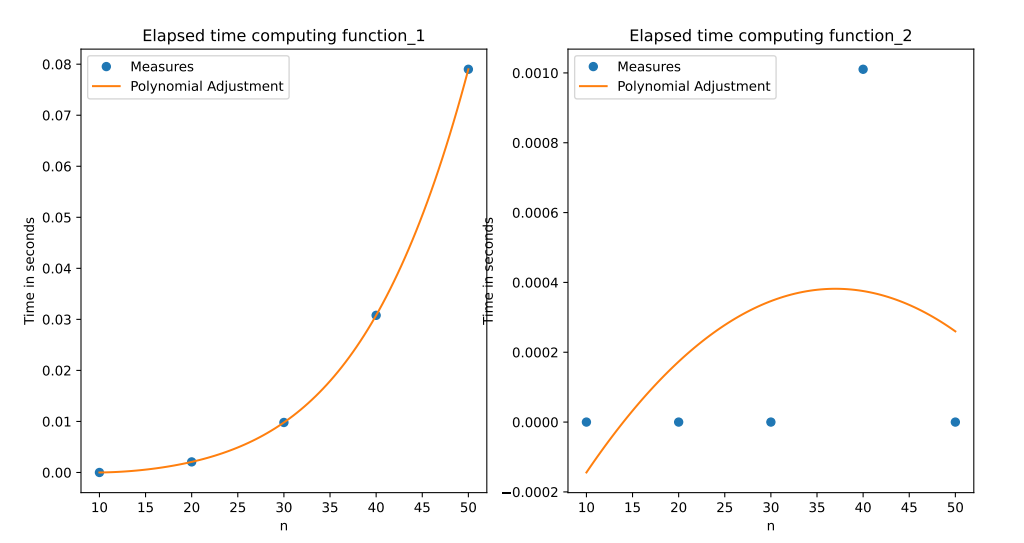  

Nous pouvons voir que pour la function_1 nous avons bien trouvé la bonne complexité. Néanmoins ce n'est pas le cas de la function_2. Malheureusement je n'ai pas réussi à trouver d'où provenait l'erreur de complexité.